Temporary jupyter notebook file to look at the data in canada.csv

In [1]:
# Setup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly_express as px

import analyze_functions as af

# Load data
canada_origdata = pd.read_csv("data/canada.csv")

# List of columns
# ['Unnamed: 0', 'ID', 'Name', 'HashName', 'Sex', 'Age', 'Height',
#       'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport',
#       'Event', 'Medal', 'region', 'notes', '_merge']


In [3]:
canada_bestsports = af.count_medals_n(canada_origdata, "Sport")

# Sort
canada_bestsports = canada_bestsports.sort_values("Total", ascending=False)

# check head
print(canada_bestsports.head())

# plot
fig = px.bar(canada_bestsports.head(10), 
    x = canada_bestsports.columns[0],
    y = canada_bestsports.columns[1:],
    labels={
        "value":"Number medals",
        "variable":"Medal"
    }
)
fig.update_layout(barmode="group")
fig.show()
fig.write_html("Visualiseringar/Q1_medalssport_canada.html", auto_open=True)


Medal                      Sport  Bronze  Gold  Silver  Total
19                    Ice Hockey      35   220      93    348
23                        Rowing      63    50      90    203
2                      Athletics      50    22      26     98
31                      Swimming      65     8      25     98
27     Short Track Speed Skating      16    22      32     70


In [5]:
canada_bestolympics = af.count_medals_n(canada_origdata, "Games")

canada_bestolympics = canada_bestolympics.sort_values("Total", ascending=False)
canada_bestolympics.head(10)

# plot
fig = px.bar(canada_bestolympics.head(10), 
    x = canada_bestolympics.columns[0],
    y = canada_bestolympics.columns[1:],
    labels={
        "value":"Number medals",
        "variable":"Medal"
    }
)
fig.update_layout(barmode="group")
fig.show()
fig.write_html("Visualiseringar/Q1_medalsgames_canada.html", auto_open=True)



In [30]:
canada_bestages = af.count_medals_n(canada_origdata, "Age")

# plot
fig = px.bar(canada_bestages.head(10), 
    x = canada_bestages.columns[0],
    y = canada_bestages.columns[1:],
    labels={
        "value":"Number medals",
        "variable":"Medal"
    }
)
fig.update_layout(barmode="group")
fig.show()
fig.write_html("Visualiseringar/Q1_medalsgames_canada.html", auto_open=True)


Medal Sex  Bronze  Gold  Silver  Total
0       F     209   158     153    520
1       M     242   305     285    832


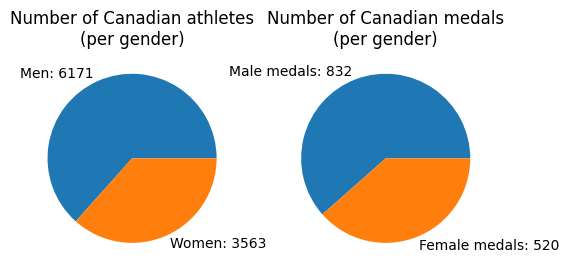

In [21]:
# Distribution of male vs female
Nmen = sum(canada_origdata["Sex"] == "M")
Nwomen = sum(canada_origdata["Sex"] == "F")

# Number of medals per sex
canada_bestsex = af.count_medals_n(canada_origdata,"Sex")

# Output
print(canada_bestsex.head())

Nmale_medals = canada_bestsex[canada_bestsex["Sex"] == "M"]["Total"].iloc[0]
Nfemale_medals = canada_bestsex[canada_bestsex["Sex"] == "F"]["Total"].iloc[0]

# Plot
fig,(ax1,ax2) = plt.subplots(1,2, dpi=100, facecolor='white')

ax1.pie([Nmen, Nwomen], 
    labels=[f"Men: {Nmen}", f"Women: {Nwomen}"]
);
ax1.title.set_text("Number of Canadian athletes\n(per gender)")

ax2.pie(
    [Nmale_medals, Nfemale_medals], 
    labels=[f"Male medals: {Nmale_medals}", f"Female medals: {Nfemale_medals}"]
);
ax2.title.set_text("Number of Canadian medals\n(per gender)")
fig.savefig("Visualiseringar/Q1_gender_canada.png")

### Idéer

Vad mer kan vi plotta? Nu har jag fokuserat på antal medaljer per diverse.

- Antal atleter per år

- ...

In [23]:
# 1. remove all columns except the two that we want to compare
canada_athletes = canada_origdata.drop(
        [column for column in canada_origdata.columns if (column != "HashName") and (column != "Games")],
        axis="columns"
    )

# 2. Remove all rows with NaN here
canada_athletes = canada_athletes.dropna(axis="rows")

# 3. Add a counter
canada_athletes["Number athletes"] = 1

# 4. Group by one of the two columns
canada_athletes = canada_athletes.groupby("Games").sum()

# Check results
canada_athletes.head()

fig = px.bar(canada_athletes, y=canada_athletes.columns[0]
)
fig.show()
fig.write_html("Visualiseringar/Q1_athletesgames_canada.html", auto_open=True)


# Temperary codes to test function etc

In [32]:
# Functions
print(canada_origdata.columns)

canada_bestsports = af.count_medals_n(canada_origdata, "Year")

print("")
print(canada_bestsports.head())

print(canada_bestsports["Gold","Total"].sum())

fig = px.bar(canada_bestsports, 
    x=canada_bestsports.columns[0], 
    y=canada_bestsports.columns[1:]
)
fig.update_layout(barmode='group')
fig.show()



Index(['Unnamed: 0', 'ID', 'Name', 'HashName', 'Sex', 'Age', 'Height',
       'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

Medal  Year  Bronze  Gold  Silver  Total
0      1900       1     1       0      2
1      1904      12    27       9     48
2      1906       0     1       1      2
3      1908      30    14       8     52
4      1912       3     3       2      8
1352


In [4]:
#import sub_df as af2


canada_bestsports = af.count_medals_n(canada_origdata, "Year")

canada_bestsports.head()

fig = px.bar(canada_bestsports, 
    x=canada_bestsports.index, 
    y=canada_bestsports.columns
)
fig.update_layout(barmode='group')
fig.show()


In [41]:
canada_bestsports[canada_bestsports.columns[0]].min()

'Alpine Skiing'

In [42]:


canada_origdata.columns




Index(['Unnamed: 0', 'ID', 'Name', 'HashName', 'Sex', 'Age', 'Height',
       'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [43]:
list(range(3,10))

[3, 4, 5, 6, 7, 8, 9]

In [44]:
"a b c d e f".split()

['a', 'b', 'c', 'd', 'e', 'f']